# Gaussian Mixture Models
Take Gaussian and add another gaussian

Fit a GMM with the Expectation-Maximization (EM) Algorithm.

We need to guess the number of gaussian distributions. However, Kernel Density Estimation (KDE) does not require guessing.


## Formulas
The basic equation is 
\begin{align*}
P(c|x) &  = \frac{P(c) P(x|c) }{ P(x) } \\
           & = \frac{P(c) P(x|c) } {\sum_i{ P(c_i) P(x|c_i)}}
\end{align*}

+ $P(x|c)$ is pdf:
$$P(x|c) = f(x|\theta) = w f_1(x|\mu_1, \sigma_1^2) + (1 - w) f_2(x|\mu_2, \sigma_2^2) $$

$$f(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi} |\sigma|} \exp^{ - \frac{ (x - \mu)^2 }{ 2 \sigma^2  }  }   $$

+ $P(c)$ is initilized as $\frac{1}{N}$ for example and will be updated during the EM iteration

A specific gaussian distribution is pulled by the points that are more likely to be classified to it. Therefore we need to compute the importances of all the points for each gaussian distribution, and the new mean and standard is based on the weights:

\begin{align*}
w_{i, c} & = P(c|x_i)  \\
 \mu & = \frac{w_1 x_1 + w_2 x_2 + \ldots + w_n x_n}{ w_1 + w_2 + \ldots + w_n  } \\
 \sigma & = \frac{w_1 (x_1  - \mu) ^ 2+ w_2 (x_2  - \mu)^2 + \ldots + w_n (x_n - \mu)^2}{ w_1 + w_2 + \ldots + w_n  }  \\
P(c) & = \frac{w_1 + w_2 + \ldots + w_n}{n} 
\end{align*}


Note that the $\mu$ in the caculation of $\sigma$ is the new mean obtained from the second equation. In K-means algorithm, $w_i$ has a value 1 if $x_i$ belongs to the class, otherwise 0.

## Expectation-Maximization Algorithm
In statistics, an EM algorithm is an **iterative** method to find the **maximum likelihood** or maximum a posterior estimates of parameters in statistical models, where the model depends on **unobserved latent variables**

EM steps:
1. Color points
2. Pull the Gaussian distribution




## Reference
+ [Expectation Maximization: how it works](https://www.youtube.com/watch?v=iQoXFmbXRJA)
+ [Gaussian Mixture Models](https://github.com/llSourcell/Gaussian_Mixture_Models)
+ [EM.4: Gaussian mixture model (GMM)](https://www.youtube.com/watch?v=9YA2t78Ha68)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
sns.set_style('white')
%matplotlib inline

In [0]:
x = np.linspace(start=-10, stop=10, num=1000)
y = stats.norm.pdf(x, loc=0, scale=1.5)

In [3]:
!wget https://raw.githubusercontent.com/brianspiering/gaussian_mixture_models/master/bimodal_example.csv
df = pd.read_csv('bimodal_example.csv')
df.head(n=5)

--2019-06-16 18:12:05--  https://raw.githubusercontent.com/brianspiering/gaussian_mixture_models/master/bimodal_example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘bimodal_example.csv.23’

bimodal_example.csv 100%[===================>]   1.18K  --.-KB/s    in 0s      

2019-06-16 18:12:05 (173 MB/s) - ‘bimodal_example.csv.23’ saved [1212/1212]



,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


In [0]:
data = df.x

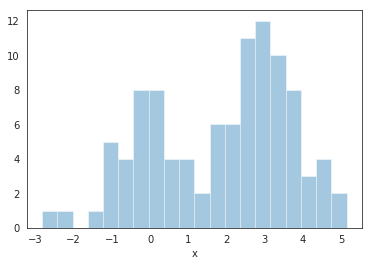

In [5]:
sns.distplot(data, bins=20, kde=False)

In [0]:
# data

## Model
2 Gaussian distributions: $N(\mu_1, \sigma_1^2)$, $N(\mu_2, \sigma_2^2)$

There are 5 parameters in total: ($w$, $\mu_1$, $\sigma_1$, $\mu_2$, $\sigma_2$). 4 of them are distribution parameters and 1 more for the probability of choosing one of them.

The probability density function (PDF) is:
$$f(x|\theta) = w f_1(x|\mu_1, \sigma_1^2) + (1 - w) f_2(x|\mu_2, \sigma_2^2)$$
where $w$ means the probability that data comes from the first Gaussian distribution and $x$ is directly observedvariabl



In [0]:
import math
import random

class Gaussian(object):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        
    def pdf(self, x):
        z = -0.5 *((x - self.mu) ** 2) / self.sigma**2
        return math.e ** z / (math.sqrt(2 * math.pi) * abs(self.sigma))
    def __str__(self):
        return 'Gaussian mu:{}, sigma:{}'.format(self.mu, self.sigma)
      
class GMM(object):
    def __init__(self, data, min_mu=min(data), max_mu=max(data), min_sigma=.1, max_sigma=1, w=0.5):
        '''
            max, min of mean are chosen from the maximum and minimum value in data
            max, min of std is custom 
            data: 1d numpy array
        '''
        self.data = data # (100, ) = (B, )
        self.g1 = Gaussian(random.uniform(min_mu, max_mu), random.uniform(min_sigma, max_sigma))
        self.g2 = Gaussian(random.uniform(min_mu, max_mu), random.uniform(min_sigma, max_sigma))    
        self.w = w
        
    def E(self):
        wprobs1, wprobs2 = list(), list()
        self.loglike = 0
#         eps = 1e-20
        eps = 0
        for x in self.data:
            
            wprob1 = self.w * self.g1.pdf(x) #/ (denominator + eps)
            wprob2 = (1 - self.w) * self.g2.pdf(x) #/ (denominator + eps) # <=> 1 - prob1
            
            denominator = wprob1 + wprob2
            wprob1 /= denominator # P(c_1|x)
            wprob2 /= denominator # P(c_2|x)
            
            self.loglike += math.log(wprob1 + wprob2)
            wprobs1.append(wprob1)
            wprobs2.append(wprob2)
        return wprobs1, wprobs2 # (B, ), (B, )
        
        
    def M(self, wprobs1, wprobs2):
        '''
            wprobs1 is a list of w * P(c_1|x)
            wprobs2 is a list of (1 - w) * P(c_2|x)
        '''
#         wprobs1 = np.array(wprobs1) # (B, )
        w1 = np.array(wprobs1) # (B, )
#         wprobs2 = np.array(wprobs2) # (B, )
        w2 = np.array(wprobs2) # (B, )
        
#         eps = 1e-20 # prevent any denominator from being 0
        eps = 0
#         w1 = wprobs1 #/ (np.sum(wprobs1) + eps) # w_1, (B, )
#         w2 = wprobs2 #/ (np.sum(wprobs2) + eps) # w_2, (B, )
        self.g1.mu = np.sum(w1 * self.data) / (np.sum(w1) + eps) # (B, )
        self.g2.mu = np.sum(w2 * self.data) / (np.sum(w2) + eps)

        self.g1.sigma = np.sqrt(np.sum(w1 * ((self.data - self.g1.mu) ** 2)) / (np.sum(w1) + eps) + eps) # !!! DO NOT FORGET SQRT
        self.g2.sigma = np.sqrt(np.sum(w2 * ((self.data - self.g2.mu) ** 2)) / (np.sum(w2) + eps) + eps)
        
        self.w = np.sum(w1) / len(w1)

    def fit(self):
        wprobs1, wprobs2 = self.E()
        self.M(wprobs1, wprobs2)

    def pdf(self, x):
        return self.w * self.g1.pdf(x) + (1 - self.w) * self.g2.pdf(x)
      
      



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


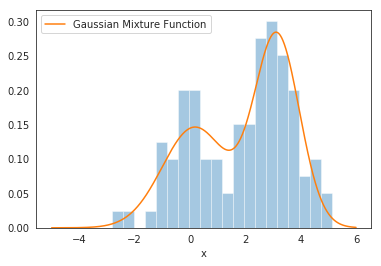

In [8]:
num_random_starts = 500
num_epochs = 20

max_loglike = -math.inf
best_model = None
for it in range(num_random_starts):
    model = GMM(np.array(data))
    for epoch in range(num_epochs):
        try:
            model.fit()
    
            if model.loglike > max_loglike:
                max_loglike = model.loglike
                best_model = model
                best_index = it
    
    
        except (ZeroDivisionError, ValueError, RuntimeWarning):
            pass
    

# ----------------- draw --------------------
sns.distplot(data,  bins=20, kde=False, norm_hist=True)
x = np.linspace(-5, 6, 1000)
plt.plot(x, best_model.pdf(x), label='Gaussian Mixture Function')
plt.legend()